### 二元分类介绍
| 模块           | 关键内容                                                                                               | 讲解要点                                                       |
| ------------ | -------------------------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| **什么是分类？**   | 用模型回答“是 / 否”或“属于哪一类”的问题                                                                            | 结果 **$y$** 不是连续数，而是离散类别                                    |
| **示例问题**     | - 这封邮件是垃圾邮件吗？<br>- 这笔交易是欺诈吗？<br>- 这枚肿瘤是恶性的吗？                                                       | 每个问题的答案只可能是 **“是 / 否”**                                    |
| **输出标签 $y$** | 只能取 **两种值** → 称为 **二元分类**                                                                          | 通常用数字表示：<br>- **0** → False / “否”<br>- **1** → True  / “是” |
| **正负类别**     | - **正类 (positive class)**：用 **1** 表示，含义是“该现象存在”<br>- **负类 (negative class)**：用 **0** 表示，含义是“该现象缺失” | “正 / 负”与“好 / 坏”无必然对应，只代表有无                                 |
| **为何用 0/1？** | - 便于模型计算（如逻辑回归的 Sigmoid 输出介于 0–1）<br>- 损失函数、评估指标都依赖数值编码                                            |                                                            |


- 为什么线性回归模型在二元分类问题上很糟糕？

1. 线性模型不会把输出限制到 0-1
2. 分类问题需要决策边界：f(x)<0.5 -> x对应的分类是0； f(x)>=0.5 -> x对应的分类是1
3. 由于分类问题的y只有0/1， 很容易来一个新的数据后，对线性模型的参数有大调整，导致决策边界出现很大变化，导致分类的表现更差，而实际情况是这个新数据的出现不应该去改变决策边界

线性回归模型在分类问题上的糟糕表现，导致需要其他的数学模型处理分类问题



### logistic回归

需要最终输出0-1的值

**Sigmoid / Logistic 函数**

$$
g(z) = \frac{1}{1 + e^{-z}}, \qquad 0 < g(z) < 1
$$

**线性组合**

$$
z = \mathbf{w}\cdot\mathbf{x} + b
$$

**逻辑回归输出**

$$
f_{\,\mathbf{w},\,b}(\mathbf{x})
  = g\!\bigl(\mathbf{w}\cdot\mathbf{x} + b\bigr)
  = \frac{1}{1 + e^{-\bigl(\mathbf{w}\cdot\mathbf{x} + b\bigr)}}
$$

- 逻辑回归输出值的解读

| 线性组合 → Sigmoid                                                                              | 输出含义                                                                                  |
| ------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| $f_{\,\mathbf{w},\,b}(\mathbf{x}) \;=\; \frac{1}{1+e^{-(\mathbf{w}\!\cdot\!\mathbf{x}+b)}}$ | 这就是 **“预测为 1 的概率”**，记作  $\displaystyle P\bigl(y=1 \mid \mathbf{x};\mathbf{w},b\bigr)$ |

* 记号：

  * $\mathbf{x}$：输入特征向量
  * $y$：标签，0 或 1
  * $\mathbf{w}, b$：模型参数



- 概率视角

$$
  f_{\,\mathbf{w},\,b}(\mathbf{x})
  = P(y=1 \mid \mathbf{x};\mathbf{w},b)
  $$
* 由于 Sigmoid 输出范围 $0\!<\!g(z)\!<\!1$，自然可解释为概率。
* 有 概率完备性：

  $$
  P(y=0) + P(y=1) = 1
  $$

- 例子

> **例子：肿瘤直径预测恶性**
>
> * 特征 $x$：肿瘤直径（cm）
> * 标签 $y$：
>
>   * 0 ➔ 良性 (not malignant)
>   * 1 ➔ 恶性 (malignant)

若模型给出

$$
f_{\,\mathbf{w},\,b}(\mathbf{x}) = 0.7
$$

则可解读为：**该肿瘤为恶性的概率为 70%**。

* 若设阈值 0.5，则判定 $y=1$（恶性）。

### 决策边界


给定逻辑回归模型
$$
f_{\,\mathbf{w},\,b}(\mathbf{x}) = g\!\bigl(\mathbf{w}\!\cdot\!\mathbf{x}+b\bigr)
                                  = \frac{1}{1 + e^{-\bigl(\mathbf{w}\!\cdot\!\mathbf{x}+b\bigr)}} ,
$$

它可解释为

$$
f_{\,\mathbf{w},\,b}(\mathbf{x})
     \;=\;
     P\!\bigl(y = 1 \mid \mathbf{x}; \mathbf{w}, b\bigr),
$$

即“在输入 $\mathbf{x}$ 下，$y$ 为 1 的概率”。


- 0 或 1？—— 使用阈值 (threshold)

**选择阈值 0.5**：

  $$
    \hat{y} \;=\;
    \begin{cases}
      1, & f_{\,\mathbf{w},\,b}(\mathbf{x}) \,\ge\, 0.5 \\
      0, & f_{\,\mathbf{w},\,b}(\mathbf{x}) \,<\, 0.5
    \end{cases}
  $$

- 进一步推导何时 $f_{\,\mathbf{w},\,b}(\mathbf{x}) \ge 0.5$：

  $$
  \begin{aligned}
    f_{\,\mathbf{w},\,b}(\mathbf{x}) \,\ge\, 0.5
      \ &\Longleftrightarrow\;
      g(z) \,\ge\, 0.5 \\
      \ &\Longleftrightarrow\;
      z = \mathbf{w}\!\cdot\!\mathbf{x} + b \,\ge\, 0 ,
  \end{aligned}
  $$

  于是有

  $$
    \hat{y} \;=\;
    \begin{cases}
      1, & \mathbf{w}\!\cdot\!\mathbf{x} + b \ge 0 \\
      0, & \mathbf{w}\!\cdot\!\mathbf{x} + b < 0 .
    \end{cases}
  $$

- **结论**：
  决策边界由超平面 $\mathbf{w}\!\cdot\!\mathbf{x} + b = 0$ 给出；Sigmoid + 阈值 0.5 等价于判断该线性函数的符号。


- 决策边界的例子

![决策边界图](./images/监督学习-分类1.png)
![决策边界图-非线性](./images/监督学习-分类2.png)

![决策边界图-非线性2](./images/监督学习-分类3.png)

- 快速问答：假设你正在开发一款肿瘤检测算法，目的是先行筛查出可能的肿瘤并提交给专家进一步检查。那么，该把判定阈值设置为多少才合适？
1. 较高，比如阈值设置为0.9
2. 较低，比如阈值设置为0.2

### 代码绘制决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* **数据集**

假设你有如下训练数据集：

* 输入变量 `X` 是一个 NumPy 数组，包含 6 条训练样本，每条样本有两个特征
* 输出变量 `y` 也是一个 NumPy 数组，同样包含 6 条样本，其取值仅为 `0` 或 `1`


In [7]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

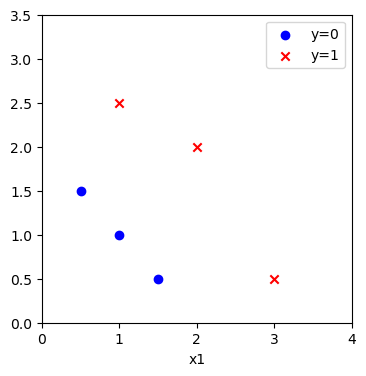

In [15]:
# 随堂练习：把X里的每个样本（x0,x1)看成坐标绘制散点图，要求样本对应的分类是0画圆，样本对应的分类是1画叉，绘图如下：
fig,ax = plt.subplots(1,1,figsize=(4,4))

# TODO: 在ax上绘图


# ------- 这里不用修改 ---------------
# 设置坐标刻度，x：0-4， y：0-3.5
ax.axis([0,4,0,3.5])
plt.show()

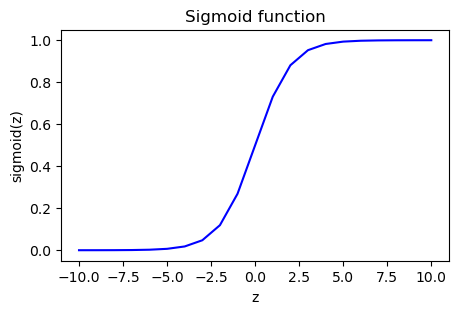

In [17]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 在-10 到 10 画 sigmoid(z)
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))

# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
plt.show()

* **绘制决策边界**

现在看逻辑回归模型是如何进行预测的。

* 我们的逻辑回归模型为

  $$
  f(\mathbf{x}) \;=\; g\!\bigl(-3 + x_0 + x_1\bigr)
  $$

* 根据前面的推导，当

  $$
  -3 + x_0 + x_1 \;\ge\; 0
  $$

  时，模型预测 $y = 1$。

下面用图形方式展示这一点。首先绘制方程

$$
-3 + x_0 + x_1 = 0
$$

这等价于

$$
x_1 = 3 - x_0.
$$


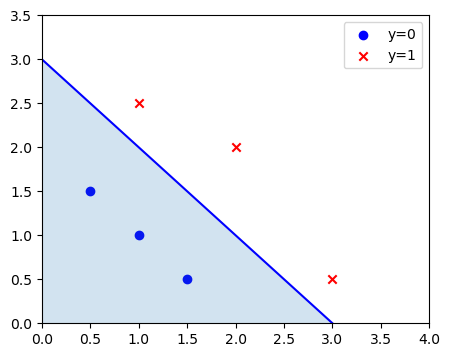

In [21]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# 随堂练习：
# 1. 把刚才 的把X里的数据看成坐标 画成根据y分类绘制的散点图的代码，定义到一个函数里 ，直接调用函数绘制数据. 函数参数接收 X,y 和 ax（子图对象）
# TODO


x0 = np.arange(0, 6)
# 2. 根据公式 x1 = 3-x0，画决策边界
# TODO
x1 = ...




# ------- 这里不用修改 ---------------
ax.axis([0, 4, 0, 3.5])
ax.fill_between(x0,x1, alpha=0.2) # 填充在线下面的区域
plt.show()

# 两个练习实现正确，会得到如下图片：

### 损失函数

逻辑回归不适用线性回归的损失函数：$$
J(\mathbf{w},b)=\frac{1}{2m}\sum_{i=0}^{m-1}
\Bigl(f_{\mathbf{w},b}\bigl(\mathbf{x}^{(i)}\bigr)-y^{(i)}\Bigr)^{2}
\tag{3}$$

1. **损失函数形状**

   * 线性回归的损失函数是碗形（convex）  —— 只有一个最低点。往下滚一定能滚到谷底。
   * 逻辑回归也应用平方误差做损失函数的话，则不是碗形，会有很多局部最小值，梯度下降可能陷入局部最小值

2. **用途不同**

   * 线性回归要预测一个连续数值，用“距离差的平方”来衡量误差最直观。
   * 逻辑回归要预测 0‑1 分类／概率，不需要把误差平方；而是关注分类的概率

所以：**同样的平方误差损失函数，在线性回归是好用的碗形函数；放到逻辑回归就变成很多局部最小值，找不到最好解**——这就是为什么逻辑回归通常改用其他函数


- 单个样本的损失定义：
$$
L\!\bigl(f_{\vec w,b}(\vec x^{(i)}),\,y^{(i)}\bigr)=
\begin{cases}
-\;\log\!\bigl(f_{\vec w,b}(\vec x^{(i)})\bigr), & \text{if } y^{(i)} = 1 \\[6pt]
-\;\log\!\bigl(1-f_{\vec w,b}(\vec x^{(i)})\bigr), & \text{if } y^{(i)} = 0
\end{cases}
$$


- 为什么选择 $-\log f(\mathbf{x})$ 作为 $y=1$ 的损失？

1. **单调惩罚**：$-\log z$ 在 $0<z<1$ 内严格递减，概率越接近 1 损失越小；概率越偏离 1 损失急速增大。
2. **零‑极大极限**：

   * $f\rightarrow 1$ ⇒ 损失 $\rightarrow 0$，最好情况零惩罚；
   * $f\rightarrow 0$ ⇒ 损失 $\rightarrow +\infty$，最坏情况无限惩罚。

---
* **为什么选择 $-\log\bigl(1-f(\mathbf{x})\bigr)$ 作为 $y=0$ 的损失？**

1. **单调惩罚**
   $-\log(1-z)$ 在 $0<z<1$ 区间严格 **递增**：

   * 当模型把正类概率 $f(\mathbf{x})$ 维持在 **接近 0** 时，$(1-f)$ 接近 1，损失最小；
   * 一旦模型把 $f(\mathbf{x})$ 提高（误判为正类的倾向越强），$(1-f)$ 变小，$-\log(1-f)$ 急速上升，惩罚越大。

2. **零‑极大极限**

   * $f\rightarrow 0$ ⇒ $1-f\rightarrow 1$ ⇒ $-\log 1 = 0$ → **最佳情况零惩罚**；
   * $f\rightarrow 1$ ⇒ $1-f\rightarrow 0$ ⇒ $-\log 0 \to +\infty$ → **最坏情况无限惩罚**。



> **总结**  预测值越远离标签值，损失越大


**逻辑回归：成本函数（Cost）与单样本损失（Loss）**



1. 成本函数

$$
J(\,\vec w,\,b\,)\;=\;\frac{1}{m}\sum_{i=1}^{m}
   L\bigl(f_{\vec w,b}\!\bigl(\vec x^{(i)}\bigr),\,y^{(i)}\bigr)
$$

* 其中 $m$ 为训练样本数。
* $f_{\vec w,b}(\vec x)=\dfrac{1}{1+e^{-(\vec w\cdot\vec x+b)}}$ 为模型输出的“正类概率”。
* **目标**：寻找参数 $\vec w, b$ 使成本 $J$ 最小。


2. 单样本损失

$$
L\bigl(f_{\vec w,b}(\vec x^{(i)}),\,y^{(i)}\bigr)=
\begin{cases}
-\;\log\!\bigl(f_{\vec w,b}(\vec x^{(i)})\bigr), & \text{若 } y^{(i)} = 1 \\[6pt]
-\;\log\!\bigl(1-f_{\vec w,b}(\vec x^{(i)})\bigr), & \text{若 } y^{(i)} = 0
\end{cases}
$$



 3. 说明

| 词条                    | 含义                                                |
|-----------------------| ------------------------------------------------- |
| **loss（单样本损失）**       | 单个样本对整体成本的贡献。                                     |
| **cost（全部样本损失，代价，成本）** | 全部样本的平均损失，用于评估当前 $\vec w,b$。                      |
| **凸性 (convex，碗状)**    | 当使用上述对数损失时，成本 $J$ 对 $\vec w,b$ 是凸的 ⇒ 梯度下降可达全局最小值。 |

> 用对数损失把每个样本的“错得有多离谱”量化，再取平均构成成本函数，随后通过优化（如梯度下降）寻找成本最低的参数。


- 成本函数的简化写法

1.  用“指示系数”把两行合并

令 $y\in\{0,1\}$ 本身就作为 **指示器**（indicator）：

$$
L\bigl(f(\mathbf{x}),\,y\bigr)\;=\;
-\;y\,\log f(\mathbf{x})\;-\;(1-y)\,\log\!\bigl(1-f(\mathbf{x})\bigr)
$$

* 如果 **$y=1$**

  $$
  L = -1\cdot\log f(\mathbf{x}) \;-\;(1-1)\cdot\log(1-f)= -\log f(\mathbf{x})
  $$

  第二项被 $0$ 抹掉，只剩正类损失。

* 如果 **$y=0$**

  $$
  L = -0\cdot\log f(\mathbf{x}) \;-\;(1-0)\cdot\log(1-f)= -\log\!\bigl(1-f(\mathbf{x})\bigr)
  $$

  第一项消失，只剩负类损失。


2. 合并公式的意义

| 优点         | 说明                                                                                      |
| ---------- | --------------------------------------------------------------------------------------- |
| **简洁**     | 不必在代码或推导中写两套 if–else 逻辑。                                                                |
| **向量化**    | 可以一次性对整批样本计算：$-\mathbf y^\top\!\log\mathbf f-\! (1-\mathbf y)^\top\!\log(1-\mathbf f)$。 |
| **梯度推导统一** | 对 $\mathbf w,b$ 求偏导时，只需处理这一行公式即可，简化推导与实现。                                               |


> **总结**
> 把 $y$ 当作 0‑1 指示器乘到对应项上，自动“关掉”不该出现的对数项，因此两种情况自然合并为一条公式，既简洁又便于计算。


- 最终的成本函数

1. 单样本损失（Loss）

$$
\boxed{
\displaystyle
L\!\bigl(f_{\vec w,b}(\vec x^{(i)}),\,y^{(i)}\bigr)
  = -\,y^{(i)}\,\log\!\bigl(f_{\vec w,b}(\vec x^{(i)})\bigr)
    \;-\;\bigl(1-y^{(i)}\bigr)\,
       \log\!\Bigl(1-f_{\vec w,b}(\vec x^{(i)})\Bigr)
}
$$



2. 总体成本（Cost）

$$
\boxed{
\displaystyle
J(\vec w,b)
   = \frac{1}{m}\sum_{i=1}^{m}
       L\!\bigl(f_{\vec w,b}(\vec x^{(i)}),\,y^{(i)}\bigr)
   = -\,\frac{1}{m}\sum_{i=1}^{m}
       \Bigl[
            y^{(i)}\,\log\!\bigl(f_{\vec w,b}(\vec x^{(i)})\bigr)
            \;+\;
            \bigl(1-y^{(i)}\bigr)\,\log\!\Bigl(1-f_{\vec w,b}(\vec x^{(i)})\Bigr)
       \Bigr]
}
$$

> **性质**
>
> * 对参数 $(\vec w,b)$ 来说，$J$ 是 **凸函数 (convex)**；
> * 因此在优化过程中存在 **唯一的全局最小值 (single global minimum)**。


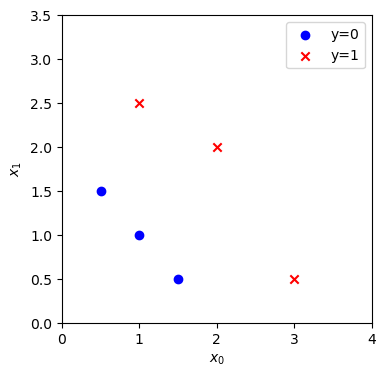

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)


fig,ax = plt.subplots(1,1,figsize=(4,4))
plotData(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

In [8]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    cost = 0.0
    # TODO： 实现成本函数，返回损失值
    return cost

w_test = np.array([1,1])
b_test = -3
assert np.isclose(compute_cost_logistic(X_train, y_train, w_test, b_test), 0.36686678640551745), "损失函数实现有问题"


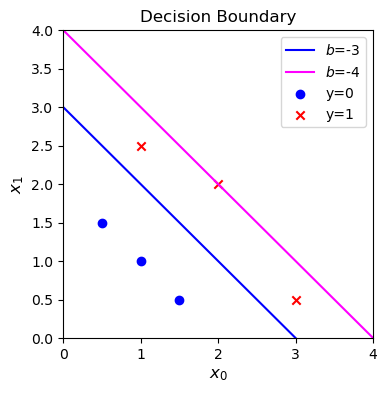

In [9]:
x0 = np.arange(0,6)

# 画两个决策边界
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c="blue", label="$b$=-3")
ax.plot(x0,x1_other, c="magenta", label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plotData(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [10]:
# 可以看出来b=-4，w=[1,1]比 b=-3， w=[1,1]的决策边界更糟糕，通过调用实现的损失函数，也可以反映这一点

w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("损失值  b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("损失值  b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

损失值  b = -3 :  0.36686678640551745
损失值  b = -4 :  0.5036808636748461


- 从概率角度解释损失函数 （可选）

1. 建模假设

* 每个样本 $\bigl(\mathbf x^{(i)},y^{(i)}\bigr)$ **独立同分布 (i.i.d.)**
* 标签 $y^{(i)}\in\{0,1\}$ 遵循 **伯努利分布**，其成功概率由模型给出：

  $$
    P\!\bigl(y^{(i)}=1\mid \mathbf x^{(i)}\bigr)=
      f_{\mathbf w,b}\!\bigl(\mathbf x^{(i)}\bigr)=
      \sigma\!\bigl(\mathbf w^\top\mathbf x^{(i)}+b\bigr)
  $$

  其中 $\sigma(z)=\dfrac{1}{1+e^{-z}}$。



2. 写出**似然函数**

对全部 $m$ 个样本，联合概率（似然）为

$$
\mathcal L(\mathbf w,b)
  =\prod_{i=1}^{m}
     \bigl[f_{\mathbf w,b}(\mathbf x^{(i)})\bigr]^{y^{(i)}}
     \bigl[1-f_{\mathbf w,b}(\mathbf x^{(i)})\bigr]^{1-y^{(i)}}
$$


3. 取对数 → **对数似然**

$$
\log\mathcal L(\mathbf w,b)
  =\sum_{i=1}^{m}
     \Bigl[
        y^{(i)}\log f_{\mathbf w,b}(\mathbf x^{(i)})
        +\bigl(1-y^{(i)}\bigr)\log\!\bigl(1-f_{\mathbf w,b}(\mathbf x^{(i)})\bigr)
     \Bigr]
$$


4. 取负平均 → 得到**损失/成本函数**

最大似然 → **最大化** $\log\mathcal L$。
等价于 **最小化** 其 **负** 值，再除以样本数 $m$ 得平均损失：

$$
J(\mathbf w,b)
  =-\frac{1}{m}\log\mathcal L(\mathbf w,b)
  =-\frac{1}{m}\sum_{i=1}^{m}
     \Bigl[
        y^{(i)}\log f_{\mathbf w,b}(\mathbf x^{(i)})
        +\bigl(1-y^{(i)}\bigr)\log\!\bigl(1-f_{\mathbf w,b}(\mathbf x^{(i)})\bigr)
     \Bigr]
$$

注意括号里的那一项 **正是单样本损失**

$$
L\bigl(f(\mathbf x^{(i)}),y^{(i)}\bigr)
  =-\,y^{(i)}\log f(\mathbf x^{(i)})
   -\bigl(1-y^{(i)}\bigr)\log\!\bigl(1-f(\mathbf x^{(i)})\bigr)
$$


5. 结果与意义

    1. **统计一致**：损失函数不是随意挑的，而是伯努利模型在 MLE 框架下自然得到的 **负对数似然**（即交叉熵）。
    2. **可解释性**：最小化 $J$ ⇔ 最大化训练数据出现的概率；因此学到的 $\hat f(\mathbf x)$ 可以直接解释为“在当前参数下，输入 $\mathbf x$ 属于正类的最大似然概率”。


**总结**：逻辑回归把每个标签视为一次伯努利试验，最大似然估计要求“让观测到的数据最可能发生”。


- 逻辑回归的梯度下降

**Logistic 回归：成本函数、梯度及批量梯度下降更新公式**

1. 成本函数（Cost）

$$
\boxed{
\displaystyle
J(\vec w,b)
  = -\,\frac{1}{m}\sum_{i=1}^{m}
     \Bigl[
        y^{(i)}\;\log f_{\vec w,b}\!\bigl(\vec x^{(i)}\bigr)
        \;+\;
        \bigl(1-y^{(i)}\bigr)\,
        \log\!\Bigl(1-f_{\vec w,b}\!\bigl(\vec x^{(i)}\bigr)\Bigr)
     \Bigr]
}
$$

其中

$$
f_{\vec w,b}(\vec x)=\frac{1}{1+e^{-(\vec w\cdot\vec x+b)}}\in(0,1)
$$


2. 批量梯度（对全部 $m$ 个样本求平均）

$$
\begin{aligned}
\frac{\partial J}{\partial w_j}
  &= \frac{1}{m}\sum_{i=1}^{m}
        \bigl(f_{\vec w,b}(\vec x^{(i)})-y^{(i)}\bigr)\,
        x^{(i)}_j \\[6pt]
\frac{\partial J}{\partial b}
  &= \frac{1}{m}\sum_{i=1}^{m}
        \bigl(f_{\vec w,b}(\vec x^{(i)})-y^{(i)}\bigr)
\end{aligned}
$$


3. 批量梯度下降（同时更新）

$$
\textbf{repeat\;\{}\quad
  \begin{cases}
    w_j \;=\;
      w_j
      \;-\;
      \alpha\,
      \dfrac{\partial J}{\partial w_j}\,,
      & j = 1,\dots,n \\[8pt]
    b   \;=\;
      b
      \;-\;
      \alpha\,
      \dfrac{\partial J}{\partial b}
  \end{cases}
\quad\textbf{\}}
$$

* $\alpha$ 为学习率 (learning rate)。
* 所有参数 **同时更新**（simultaneous updates）以利用同一轮次计算出的梯度。


> **说明**
>
> * 梯度项 $f_{\vec w,b}(\vec x^{(i)})-y^{(i)}$ 表示“预测概率与真实标签的偏差”；
> * 成本函数对 $(\vec w,b)$ 是**凸**的，故批量梯度下降可收敛到全局最小值。
> * 线性回归的一些技巧在逻辑回归仍然适用：选择学习率，监控迭代次数和损失值，向量化，特征缩放


In [11]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [17]:
def compute_gradient_logistic(X, y, w, b):
    """
    计算逻辑回归的梯度

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): 关于w的梯度
      dj_db (scalar)      : 关于b的导数
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    # TODO: 随堂练习：实现梯度的计算
    return dj_dw, dj_db


# 简单检查下梯度实现是否正确
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
assert np.allclose(dj_dw_tmp, np.array([0.498333393278696, 0.49883942983996693])) and np.isclose(dj_db_tmp, 0.49861806546328574), "梯度实现不正确"

In [22]:
import math,copy
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    执行 **批量梯度下降（Batch Gradient Descent）**

    参数:
      X (ndarray (m, n)): 训练数据，m 行 n 列 —— m个样本、每个样本 n个特征
      y (ndarray (m, )): 目标值（标签），长度为 m
      w_in (ndarray (n,)): 模型参数 w 的初始值
      b_in (scalar)      : 模型参数 b 的初始值
      alpha (float)      : 学习率
      num_iters (scalar) : 迭代次数

    返回:
      w (ndarray (n,)): 更新后的参数 w
      b (scalar)       : 更新后的参数 b
    """
    # 用于保存每次迭代的成本 J 以及 w，主要方便后续绘图
    J_history = []
    w = copy.deepcopy(w_in)   # 避免在函数内部修改外部的 w
    b = b_in

    for i in range(num_iters):
        # 计算梯度，再根据梯度更新参数
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)

        # 根据梯度更新参数 w 与 b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # 记录每次迭代的成本值（防止资源耗尽，仅记录前 100000 次）
        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))

        # 每进行 num_iters/10 次迭代就打印一次当前成本
        if i % math.ceil(num_iters / 10) == 0:
            print(f"第 {i:4d} 次迭代:  成本 {J_history[-1]}")

    # 返回最终的 w、b 以及成本历史，便于绘图
    return w, b, J_history


In [23]:
# 对训练数据做梯度下降
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\n最终的参数: w:{w_out}, b:{b_out}")

第    0 次迭代:  成本 0.684610468560574
第 1000 次迭代:  成本 0.1590977666870456
第 2000 次迭代:  成本 0.08460064176930081
第 3000 次迭代:  成本 0.05705327279402531
第 4000 次迭代:  成本 0.042907594216820076
第 5000 次迭代:  成本 0.034338477298845684
第 6000 次迭代:  成本 0.028603798022120097
第 7000 次迭代:  成本 0.024501569608793
第 8000 次迭代:  成本 0.02142370332569295
第 9000 次迭代:  成本 0.019030137124109114

最终的参数: w:[5.28123029 5.07815608], b:-14.222409982019837


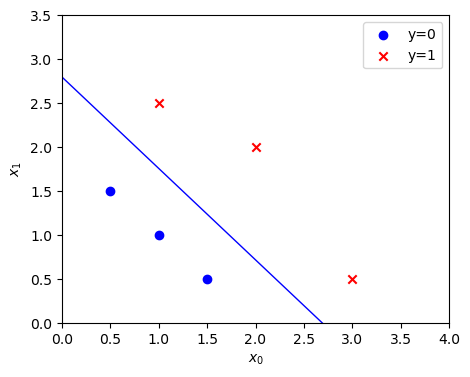

In [25]:
# def plt_prob(ax, w_out, b_out):


fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plotData(X_train,y_train,ax)

# TODO：随堂练习，根据学习到的 w_out, b_out画决策边界；  提示：利用公式 wx+b =0 -> [w1,w2]*[x1,x2]+b=0，实现正确会得到如下图像
plt.show()

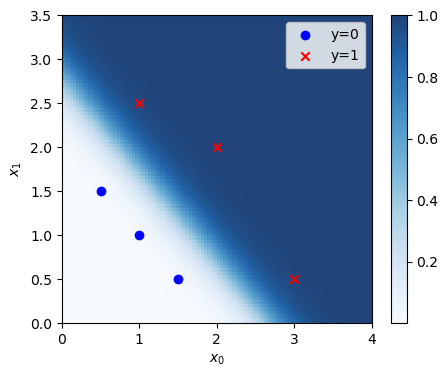

In [58]:
# 更多绘图：绘制预测y=1的概率，概率越高越蓝，概率越低，越白

fig,ax = plt.subplots(1,1,figsize=(5,4))

# 利用已训练好的参数，计算概率
def predict_proba(x, y, w0, w1, b):
    z = b + w0*x + w1*y     # 线性部分
    return 1/(1+np.exp(-z))


def plt_prob(ax, w_out,b_out):

    # 生成网格
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)

    tmp_x0,tmp_x1 = np.meshgrid(x0_space,x1_space)
    z = predict_proba(tmp_x0,tmp_x1,w_out[0], w_out[1],b_out)

    cmap = plt.get_cmap('Blues')
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z,
                   cmap=cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

plt_prob(ax, w_out,b_out)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plotData(X_train,y_train,ax)

plt.show()

### 逻辑回归成本函数的梯度推导 （可选）


#### 1. 记号与目标

| 记号                                                                 | 含义                                |
| ------------------------------------------------------------------ | --------------------------------- |
| $\mathbf x^{(i)}\in\mathbb R^{n}$                                  | 第 $i$ 个样本（含偏置前不加 1）               |
| $y^{(i)}\in\{0,1\}$                                                | 真实标签                              |
| $\mathbf w\in\mathbb R^{n},\;b\in\mathbb R$                        | 参数                                |
| $f^{(i)}\equiv f_{\mathbf w,b}(\mathbf x^{(i)}) = \sigma(z^{(i)})$ | 预测概率，$\sigma(z)=\frac1{1+e^{-z}}$ |
| $m$                                                                | 样本总数                              |

$$
J(\mathbf w,b)
  = -\frac1m\sum_{i=1}^{m}
      \Bigl[
        y^{(i)}\log f^{(i)}
        + (1-y^{(i)})\log(1-f^{(i)})
      \Bigr]
$$

目标：求 $\displaystyle\frac{\partial J}{\partial w_j}$ 与 $\displaystyle\frac{\partial J}{\partial b}$。



#### 2. 单样本损失对 $z$ 的导数

$$
L^{(i)}
  = -\bigl[y^{(i)}\log f^{(i)} + (1-y^{(i)})\log(1-f^{(i)})\bigr]
$$

   a. **对预测 $f^{(i)}$ 求导**

   $$
   \frac{\partial L^{(i)}}{\partial f^{(i)}}
     = -\frac{y^{(i)}}{f^{(i)}} + \frac{1-y^{(i)}}{1-f^{(i)}}
     = \frac{f^{(i)}-y^{(i)}}{f^{(i)}(1-f^{(i)})}
   $$

   b. **sigmoid 的导数**

   $$
   \frac{\partial f^{(i)}}{\partial z^{(i)}} = f^{(i)}\bigl(1-f^{(i)}\bigr)
   $$

   c. **链式法则**

   $$
   \frac{\partial L^{(i)}}{\partial z^{(i)}}
     = \frac{\partial L^{(i)}}{\partial f^{(i)}}\;
       \frac{\partial f^{(i)}}{\partial z^{(i)}}
     = \bigl(f^{(i)}-y^{(i)}\bigr)
   $$

#### 3. 对权重 $w_j$ 的梯度

$$
\begin{aligned}
\frac{\partial J}{\partial w_j}
  &= \frac1m\sum_{i=1}^{m}
     \frac{\partial L^{(i)}}{\partial z^{(i)}}\;
     \frac{\partial z^{(i)}}{\partial w_j}  \\
  &= \frac1m\sum_{i=1}^{m}
     \bigl(f^{(i)}-y^{(i)}\bigr)\;
     x^{(i)}_j
\end{aligned}
$$



#### 4. 对偏置 $b$ 的梯度

$$
\frac{\partial J}{\partial b}
  = \frac1m\sum_{i=1}^{m}
     \frac{\partial L^{(i)}}{\partial z^{(i)}}\;
     \frac{\partial z^{(i)}}{\partial b}
  = \frac1m\sum_{i=1}^{m}
     \bigl(f^{(i)}-y^{(i)}\bigr)
$$



#### 5. 向量化表示（推荐在代码中使用）

$$
\nabla_{\mathbf w}J = \frac1m \, \mathbf X^\top\!\bigl(\mathbf f - \mathbf y\bigr)
\quad\quad
\frac{\partial J}{\partial b} = \frac1m\sum_{i=1}^{m}(f^{(i)}-y^{(i)})
$$

* $\mathbf X\in\mathbb R^{m\times n}$ 为特征矩阵。
* $\mathbf f=[f^{(1)},\dots,f^{(m)}]^\top$。
* $\mathbf y=[y^{(1)},\dots,y^{(m)}]^\top$。



#### 6. 批量梯度下降更新

$$
\boxed{
\begin{aligned}
\mathbf w &\gets \mathbf w - \alpha\,\nabla_{\mathbf w}J \\[4pt]
b &\gets b - \alpha\,\dfrac{\partial J}{\partial b}
\end{aligned}
}
$$

（$\alpha$ 为学习率，全部参数 **同时** 更新）



- 记忆方式

> **“预测减真实，前乘特征”** —— $f-y$ 乘 $x_j$ 就是对 $w_j$ 的梯度；对偏置把 $x_j$ 看成 1 即可。

$$
\frac{\partial J}{\partial w_j}\;=\;\overbrace{\bigl(f-y\bigr)}^{\text{误差}}\;\times\;x_j
$$


### 使用机器学习库sklearn跑逻辑回归和线性回归

In [59]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

from sklearn.linear_model import LogisticRegression

# 训练
lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [60]:
# 预测
y_pred = lr_model.predict(X)

print("训练集的预测:", y_pred)

训练集的预测: [0 0 0 1 1 1]


In [61]:
# 看预测的正确率
print("训练集预测的正确率:", lr_model.score(X, y))

训练集预测的正确率: 1.0


In [62]:
def load_house_data():
    data = np.loadtxt("./datasets/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y


In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# 1. 加载数据
X_train, y_train = load_house_data()

In [64]:
# 2. 特征缩放
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"原始数据峰值差        X:{np.ptp(X_train,axis=0)}")
print(f"缩放后的峰值差       X_norm:{np.ptp(X_norm,axis=0)}")

原始数据峰值差        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
缩放后的峰值差       X_norm:[5.8452591  6.13529646 2.05626214 3.68533012]


In [65]:
# 3. 创建并拟合线性模型
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 127, number of weight updates: 12574.0


In [66]:
# 4. 看训练后的参数
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [110.14411297 -21.09261789 -32.49344783 -38.0275731 ], b:[363.13090803]


In [67]:
# 5. 预测结果

y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"机器学习库的预测和手动预测是否匹配: {(y_pred == y_pred_sgd).all()}")

print(f"训练集的预测:\n{y_pred[:4]}" )
print(f"目标值 \n{y_train[:4]}")

机器学习库的预测和手动预测是否匹配: True
训练集的预测:
[295.17729808 485.81230763 389.52734648 491.97378771]
目标值 
[300.  509.8 394.  540. ]
